# 01. Market Expectations In The Cross-Section Of Present Values

## Imports

In [2]:
import numpy as np
import pandas as pd
import sys

from matplotlib import pyplot as plt
from settings import config
from pathlib import Path
import load_data
import regressions
import pull_CRSP_index
import pull_ken_french_data
import pull_fred

# Load environment variables
DATA_DIR = Path(config("DATA_DIR"))
OUTPUT_DIR = Path(config("OUTPUT_DIR"))
WRDS_USERNAME = config("WRDS_USERNAME")
START_DATE = config("START_DATE")
END_DATE = config("END_DATE")

## Prep Data

### Step 1: Fama-French Data

In [3]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [4]:
bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")

C:\Users\zacjo\AppData\Local\Temp\ipykernel_10540\3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")
C:\Users\zacjo\AppData\Local\Temp\ipykernel_10540\3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")
C:\Users\zacjo\AppData\Local\Temp\ipykernel_10540\3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafren

In [5]:
print(bm_6_portfolios['DESCR'])

6 Portfolios 2x3
----------------

This file was created by CMPT_ME_BEME_OP_INV_RETS using the 202412 CRSP database. It contains value- and equal-weighted returns for portfolios formed on ME and BEME. The portfolios are constructed at the end of June. BEME is book value at the last fiscal year end of the prior calendar year divided by ME at the end of December of the prior year. Annual returns are from January to December. Missing data are indicated by -99.99 or -999. The break points include utilities and include financials. The portfolios include utilities and include financials. Copyright 2024 Eugene F. Fama and Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (58 rows x 6 cols)
  1 : Average Equal Weighted Returns -- Monthly (58 rows x 6 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 6 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 6 cols)
  4 : Number of Firms in Portfolios (58 rows x 6 cols)
  5 : Average Market Cap (58 rows x 6 c

In [6]:
bm_6_portfolios[6].head()

,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
Date,,,,,,
2020-03,0.1810,0.5313,1.1804,0.1574,0.5496,1.0957
2020-04,0.1813,0.5308,1.1705,0.1569,0.5448,1.0928
2020-05,0.1792,0.5297,1.1856,0.1561,0.5449,1.0953
2020-06,0.1792,0.5280,1.1877,0.1560,0.5418,1.1002
2020-07,0.1642,0.4626,1.1351,0.1252,0.4527,0.8969


### Step 2: CRSP Market Capitalization Weighted Index Data

In [7]:
crsp = pull_CRSP_index.pull_crsp_value_weighted_index()

Loading library list...
Done
Approximately 1189 rows in crsp.msi.
CRSP.msi Table Columns: ['name', 'nullable', 'type', 'comment']
CRSP value-weighted index data saved to crsp_value_weighted_index.csv
CSV file saved to C:\Users\zacjo\OneDrive\Documents\GitHub\finm32900_project_group6\data\crsp_value_weighted_index.csv


In [8]:
crsp_loaded = load_data.load_crsp_index()
crsp_loaded

,date,value_weighted_return
0,1930-02-01,0.058407
1,1930-03-01,0.028242
2,1930-04-01,0.074631
3,1930-05-01,-0.020541
4,1930-06-01,-0.014010
...,...,...
967,2010-09-01,-0.042863
968,2010-10-01,0.091628
969,2010-11-01,0.038591
970,2010-12-01,0.005117


### Step 3: Risk-Free Rate Data

In [9]:
rf = pull_fred.pull_fred()
rf

,GDP,CPIAUCNS,GDPC1,DPCREDIT,EFFR,OBFR,SOFR,DFEDTARU,DFEDTARL,WALCL,...,GFDEBTN,WTREGEN,RRPONTSYAWARD,RRPONTSYD,RPONTSYD,WSDONTL,TB3MS,Gen_IORB,ONRRP_CTPY_LIMIT,ONRP_AGG_LIMIT
DATE,,,,,,,,,,,,,,,,,,,,,
1930-01-01,NaN,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-02-01,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-03-01,NaN,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-04-01,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-05-01,NaN,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
2014-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN
2021-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN


In [10]:
rf_monthly = load_data.load_fred_data()
rf_monthly

DATE
1930-01-01    0.000000
1930-02-01    0.000000
1930-03-01    0.000000
1930-04-01    0.000000
1930-05-01    0.000000
                ...   
2010-09-01    0.000125
2010-10-01    0.000108
2010-11-01    0.000117
2010-12-01    0.000117
2011-01-01    0.000125
Name: TB3MS, Length: 973, dtype: float64

### Step 4: Excess Returns

In [11]:
ex_ret = load_data.load_and_compute_excess_returns()
ex_ret

1930-02-01    0.058407
1930-03-01    0.028242
1930-04-01    0.074631
1930-05-01   -0.020541
1930-06-01   -0.014010
                ...   
2010-09-01   -0.042988
2010-10-01    0.091520
2010-11-01    0.038474
2010-12-01    0.005000
2011-01-01    0.067057
Length: 972, dtype: float64

# Run Regressions

In [12]:
import importlib
importlib.reload(regressions)

<module 'regressions' from 'c:\\Users\\zacjo\\OneDrive\\Documents\\GitHub\\finm32900_project_group6\\src\\regressions.py'>

In [12]:
# def regress():
#     portfolio_datasets = {
#         "6-Portfolios": "6_Portfolios_2x3",
#         "25-Portfolios": "25_Portfolios_5x5",
#         "100-Portfolios": "100_Portfolios_10x10"
#     }
#     results = {}
#     for label, dataset_name in portfolio_datasets.items():
#         print(f"\nProcessing {label} Data")
#         in_sample = regressions.run_in_sample_pls(dataset_name, weighting="value-weighted", h=1)
#         recursive = regressions.run_recursive_forecast(dataset_name, weighting="value-weighted", h=1)
#         regressions.display_results(label, in_sample, recursive)
#         results[label] = {"in_sample": in_sample, "recursive": recursive}
#     return results

# regress()

# Run Regressions for B/M ratios

In [ ]:
def regress():
    portfolio_datasets = {
        # "6-Portfolios": "6_Portfolios_2x3",
        # "25-Portfolios": "25_Portfolios_5x5",
        "100-Portfolios": "100_Portfolios_10x10"
    }
    results = {}
    for label, dataset_name in portfolio_datasets.items():
        print(f"\nProcessing {label} Data")
        in_sample = regressions.run_in_sample_pls(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=1, 
            end_date='1980-01-01')
        recursive = regressions.run_recursive_forecast(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=1, 
            start_train_date='1930-01-01', 
            end_train_date='1980-01-01',
            end_forecast_date='2011-01-01')
        regressions.display_results(label, in_sample, recursive)
        results[label] = {"in_sample": in_sample, "recursive": recursive}
    return results

regress()


Processing 100-Portfolios Data
Aligned data from 1930-02-01 to 2010-06-01
Number of dates: 965
Date range: 1930-02-01 to 1980-01-01
Number of dates: 600
Date range: 1930-02-01 to 1980-01-01
Number of dates: 600
First-Stage Estimated Loadings (phi_i):
SMALL LoBM: -4.9882
ME1 BM2: 28.8575
ME1 BM3: 33.6781
ME1 BM4: 28.1365
ME1 BM5: -8.6280
ME1 BM6: 16.0307
ME1 BM7: -1.6215
ME1 BM8: -2.4905
ME1 BM9: -2.2863
SMALL HiBM: -2.2790
ME2 BM1: 1.7117
ME2 BM2: -37.7741
ME2 BM3: 35.5322
ME2 BM4: -0.3271
ME2 BM5: -1.0126
ME2 BM6: -0.7471
ME2 BM7: -2.3505
ME2 BM8: -1.0500
ME2 BM9: -1.4632
ME2 BM10: -1.0640
ME3 BM1: 23.9557
ME3 BM2: 3.0702
ME3 BM3: 8.0185
ME3 BM4: -0.3408
ME3 BM5: -0.4036
ME3 BM6: -0.6376
ME3 BM7: -1.5254
ME3 BM8: -1.2465
ME3 BM9: -1.6925
ME3 BM10: -0.0834
ME4 BM1: 0.3288
ME4 BM2: -0.0989
ME4 BM3: -0.2667
ME4 BM4: -0.4767
ME4 BM5: -0.6509
ME4 BM6: -0.5106
ME4 BM7: -0.7032
ME4 BM8: -1.1906
ME4 BM9: -1.7476
ME4 BM10: -1.5011
ME5 BM1: 16.4632
ME5 BM2: -0.1525
ME5 BM3: -0.3454
ME5 BM4: -0


[SKLEARN] Processing 100-Portfolios Data
[SKLEARN In-Sample] Data from 1930-02-01 to 1980-01-01 (n = 600)

[SKLEARN In-Sample] OLS Regression Summary on PLS Factor:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.657
Date:                Wed, 12 Mar 2025   Prob (F-statistic):              0.104
Time:                        19:42:10   Log-Likelihood:                 843.69
No. Observations:                 600   AIC:                            -1683.
Df Residuals:                     598   BIC:                            -1675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t 

c:\Users\zacjo\OneDrive\Documents\GitHub\finm32900_project_group6\src\regressions.py:441: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_value = model.predict(X_curr)[0]
c:\Users\zacjo\OneDrive\Documents\GitHub\finm32900_project_group6\src\regressions.py:441: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_value = model.predict(X_curr)[0]
c:\Users\zacjo\OneDrive\Documents\GitHub\finm32900_project_group6\src\regressions.py:441: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior


[SKLEARN] Results for 100-Portfolios Portfolio Data

[SKLEARN] Third-Stage In-Sample Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.657
Date:                Wed, 12 Mar 2025   Prob (F-statistic):              0.104
Time:                        19:42:15   Log-Likelihood:                 843.69
No. Observations:                 600   AIC:                            -1683.
Df Residuals:                     598   BIC:                            -1675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

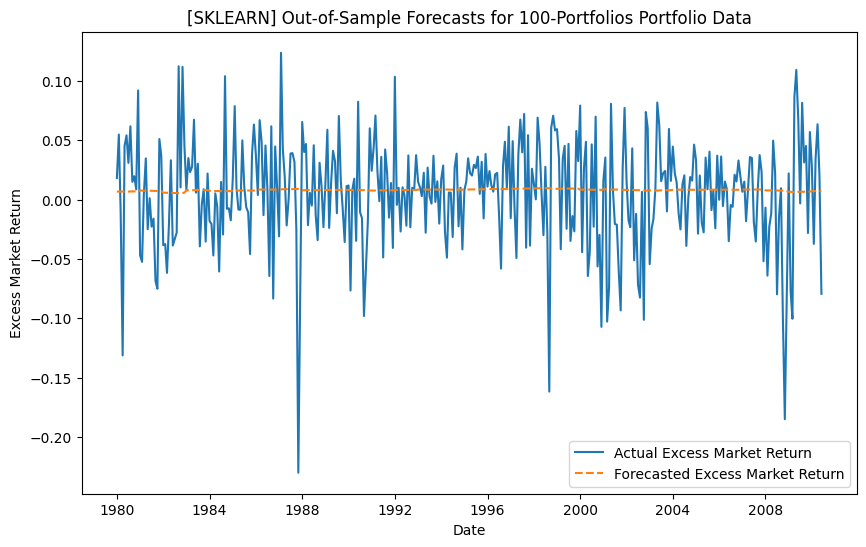

{'100-Portfolios': {'in_sample': {'pls_model': PLSRegression(n_components=1),
   'ols_model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2d5d35d86d0>,
   'factor':                    F
   1930-02-01 -6.204006
   1930-03-01 -6.177222
   1930-04-01 -6.138185
   1930-05-01 -6.171088
   1930-06-01 -6.143549
   ...              ...
   1979-09-01  1.166970
   1979-10-01  1.169017
   1979-11-01  1.166092
   1979-12-01  1.191188
   1980-01-01  1.178470
   
   [600 rows x 1 columns],
   'X':             SMALL LoBM  ME1 BM2  ME1 BM3  ME1 BM4  ME1 BM5  ME1 BM6  ME1 BM7  \
   1930-02-01      0.2461 -99.9900 -99.9900   1.3649   1.2215 -99.9900   2.3772   
   1930-03-01      0.2503 -99.9900 -99.9900   1.3649   1.2215 -99.9900   2.3558   
   1930-04-01      0.2649 -99.9900 -99.9900   1.3649   1.2215 -99.9900   2.0776   
   1930-05-01      0.2700 -99.9900 -99.9900   1.3649   1.2215 -99.9900   2.0805   
   1930-06-01      0.2674 -99.9900 -99.9900   1.3649   1.2215 -99.9900   2.1

In [13]:
def regress_sklearn():
    portfolio_datasets = {
        # "6-Portfolios": "6_Portfolios_2x3",
        # "25-Portfolios": "25_Portfolios_5x5",
        "100-Portfolios": "100_Portfolios_10x10"
    }
    results = {}
    for label, dataset_name in portfolio_datasets.items():
        print(f"\n[SKLEARN] Processing {label} Data")
        in_sample_results = regressions.run_in_sample_pls_sklearn(
            dataset_name=dataset_name,
            weighting="BE_FYt-1_to_ME_June_t",
            h=1,
            end_date='1980-01-01',
            n_components=1
        )
        forecast_series, actual_series, R2_oos = regressions.run_recursive_forecast_sklearn(
            dataset_name=dataset_name,
            weighting="BE_FYt-1_to_ME_June_t",
            h=1,
            start_train_date='1930-01-01',
            end_train_date='1980-01-01',
            end_forecast_date='2011-01-01',
            n_components=1
        )
        regressions.display_results_sklearn(label, in_sample_results, forecast_series, actual_series, R2_oos)
        results[label] = {
            "in_sample": in_sample_results,
            "forecast_series": forecast_series,
            "actual_series": actual_series,
            "R2_oos": R2_oos
        }
    return results

regress_sklearn()